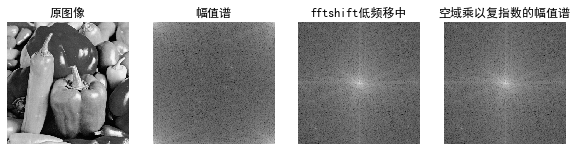

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

#低频移中
img = cv2.imread(r'..\img\peppers.bmp',0)
dft = np.fft.fft2(img)
dft_fftshift=np.fft.fftshift(dft)
magnitude00= 20*np.log(1+np.abs(dft))#幅值谱
magnitude01= 20*np.log(1+np.abs(dft_fftshift))#低频移中幅值谱
row,col=img.shape[:2]
img1=np.zeros((row,col),dtype=np.float)
for i in range(row):
    for j in range(col):
        img1[i,j]=img[i,j]*((-1)**(i+j))
dft1 = np.fft.fft2(img1)
magnitude1= 20*np.log(1+np.abs(dft1))#低频移中幅值谱
        

plt.figure(figsize=(10,6))
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('原图像'), plt.axis('off')
plt.subplot(142),plt.imshow(magnitude00, cmap = 'gray')
plt.title('幅值谱'), plt.axis('off')
plt.subplot(143),plt.imshow(magnitude01, cmap = 'gray')
plt.title('fftshift低频移中'), plt.axis('off')
plt.subplot(144),plt.imshow(magnitude1, cmap = 'gray')
plt.title('空域乘以复指数的幅值谱'), plt.axis('off')

plt.savefig("ch4-11.jpg")
# plt.show()
